# Comparison of Models

Throughout our modelling, we explored several performance metrics. Since the data was unbalanced, we used the ROC curve instead of the accuracy. This is because the ROC curve illustrates the tradeoff between the sensitivity and specificity and this was of greater importance in the unbalanced setting.


REMEMBER (FROM ASSESSMENT GUIDANCE:)
Half of the effort should be devoted to exploring appropriate performance
measures. Think about the circumstances by which your chosen performance
metric will lead to real-world generalisability, and how it might compromise
this for the purpose of standardization. Demonstrate this with data and/or
simulation; for example, if you believe that you can predict new types of data,
you could demonstrate this by leaving out some types of data and observing
your performance. Examine in what sense your group’s best method is truly
best.

Checklist:
- Explore performance measures - CHECK because we have all done this - looking at ROC curves, confusion matrices etc
- Demonstrate generalisability with data - CHECK because we have all done this. We found predictions on the test set and found the ROC curve.
- Examine in what sense your group's best method is the best - IN PROGRESS. I have gotten a start on this by loading the LDA and RF results. I have plotted the predictions. We still need logistic, and after that we can do a write-up. We should also do a discussion on each of our methods. Perhaps we provide a condensed version of our individual discussions (5.4 and 4.3 condensed here?)


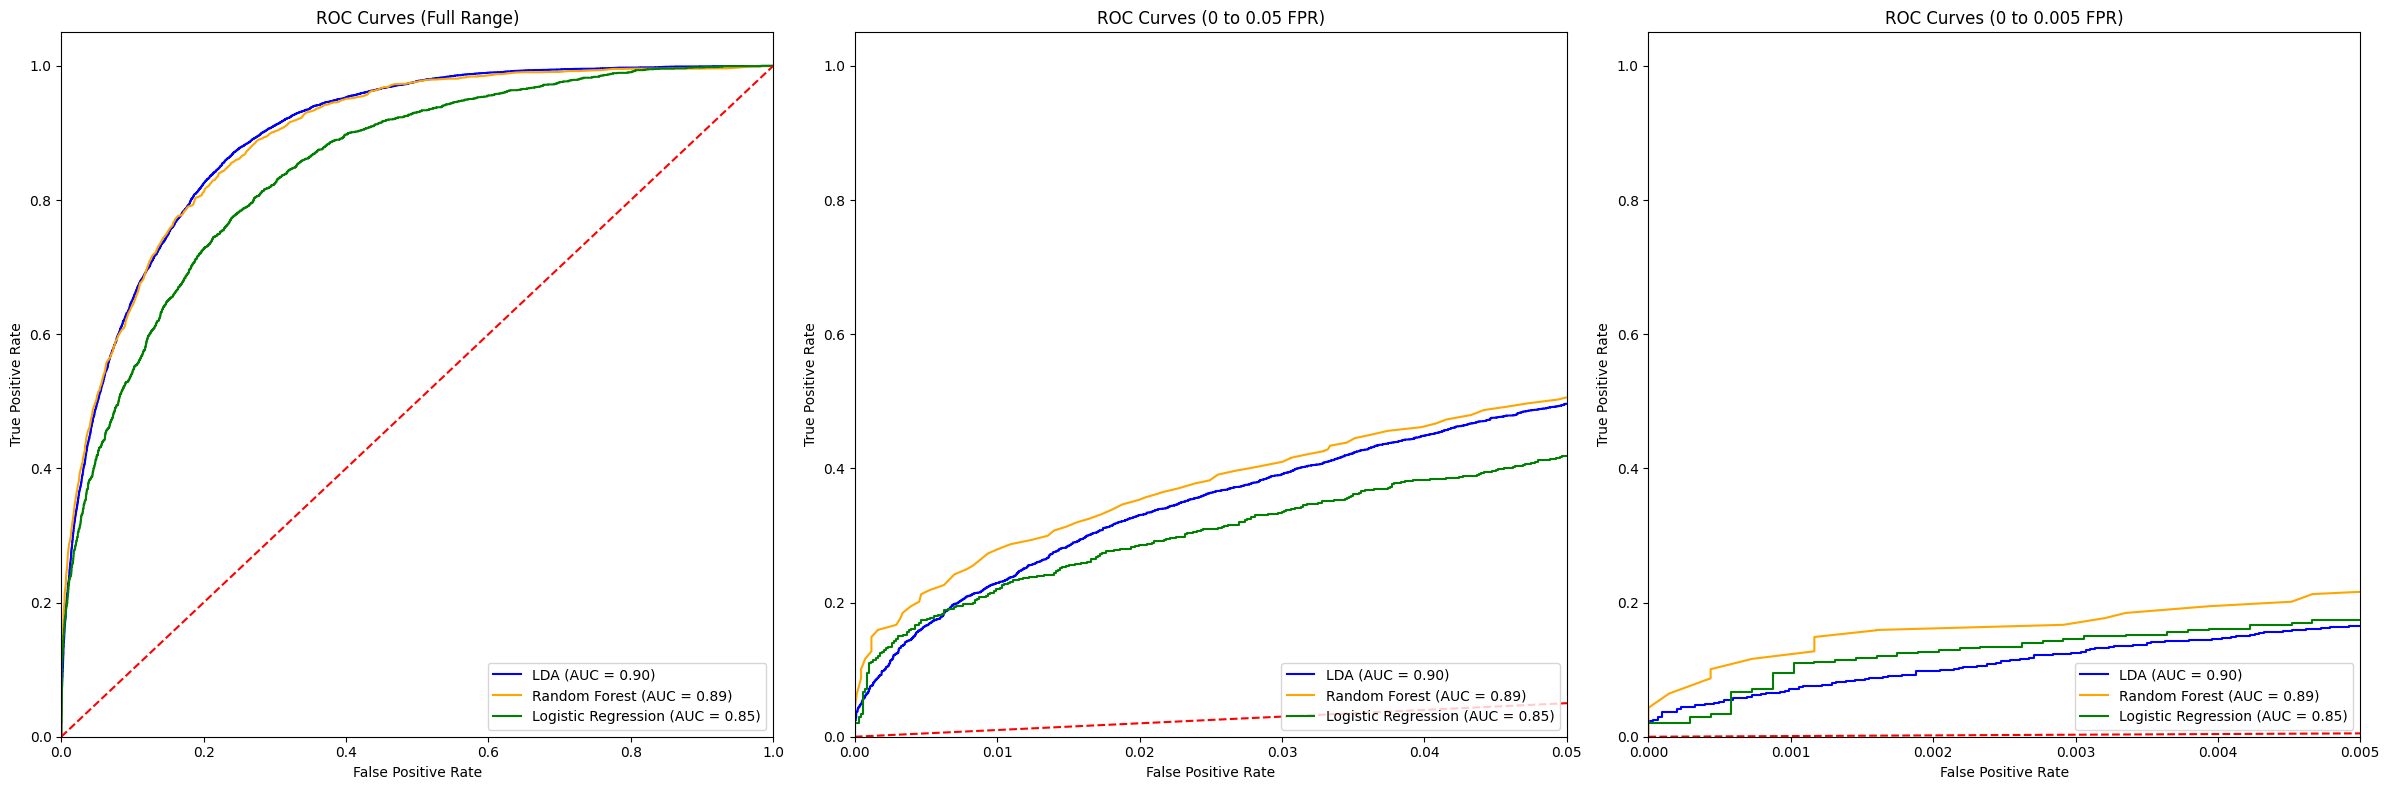

In [10]:
import pickle
import matplotlib.pyplot as plt

# Load ROC data for LDA, Random Forest, and Logistic Regression
with open("pickle/LDA_roc_data.pkl", 'rb') as file:
    lda_roc_data = pickle.load(file)
with open("pickle/rf_roc_data.pkl", 'rb') as file:
    rf_roc_data = pickle.load(file)
with open("pickle/logit_roc_data.pkl", 'rb') as file:
    logit_roc_data = pickle.load(file)

# Define a function to plot ROC curves on specified axis and x-axis range
def plot_roc(ax, xlim, title):
    ax.plot(lda_roc_data['fpr_lda'], lda_roc_data['tpr_lda'], color='blue', 
            label=f'LDA (AUC = {lda_roc_data["roc_auc_lda"]:.2f})')
    ax.plot(rf_roc_data['fpr'], rf_roc_data['tpr'], color='orange', 
            label=f'Random Forest (AUC = {rf_roc_data["roc_auc"]:.2f})')
    ax.plot(logit_roc_data['fpr'], logit_roc_data['tpr'], color='green', 
            label=f'Logistic Regression (AUC = {logit_roc_data["roc_auc"]:.2f})')
    ax.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random guessing diagonal
    ax.set_xlim(xlim)
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(title)
    ax.legend(loc='lower right')
    ax.grid(False)

# Create subplots: full range, small range (0-0.05), very small range (0-0.005)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24, 8))

# Plot using the helper function for different x-axis ranges
plot_roc(ax1, [0.0, 1.0], 'ROC Curves (Full Range)')
plot_roc(ax2, [0.0, 0.05], 'ROC Curves (0 to 0.05 FPR)')
plot_roc(ax3, [0.0, 0.005], 'ROC Curves (0 to 0.005 FPR)')

# Show the plots
plt.tight_layout()
plt.show()


We see that LDA has a higher ROC than the random forest. To inspect our chosen question of looking at the variation of income by sex, we look at the actual and predicted income by sex. 

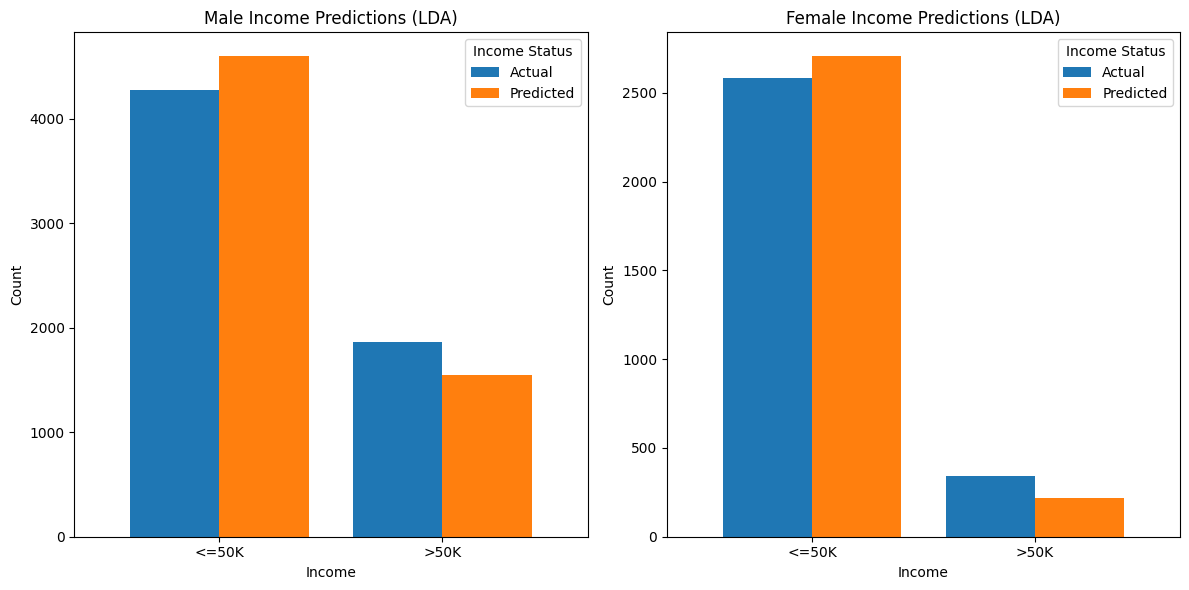

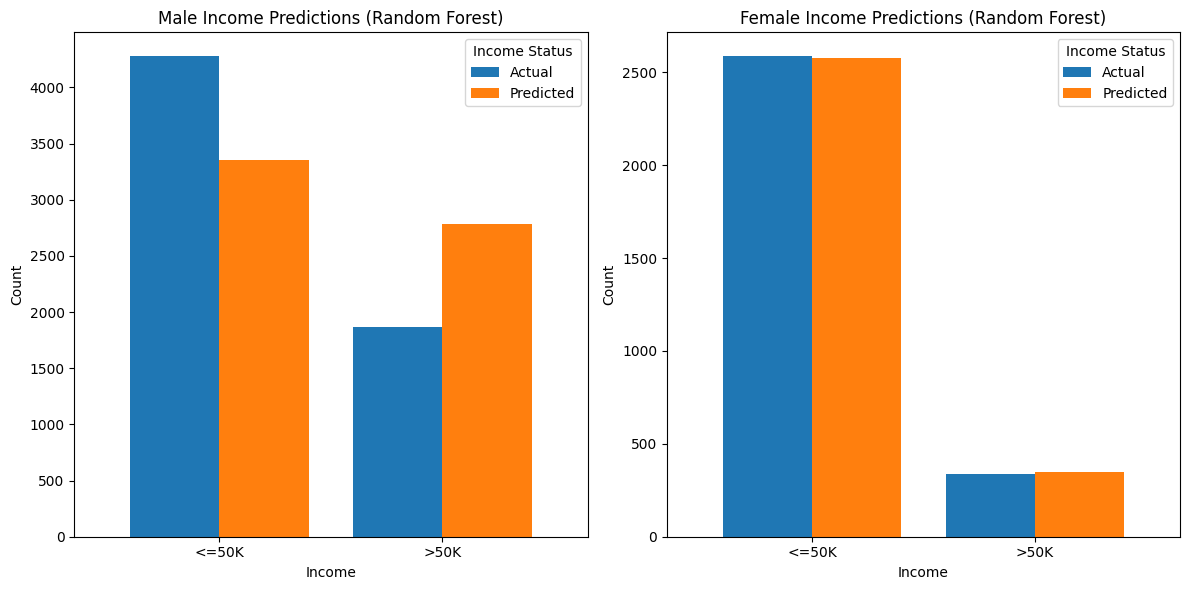

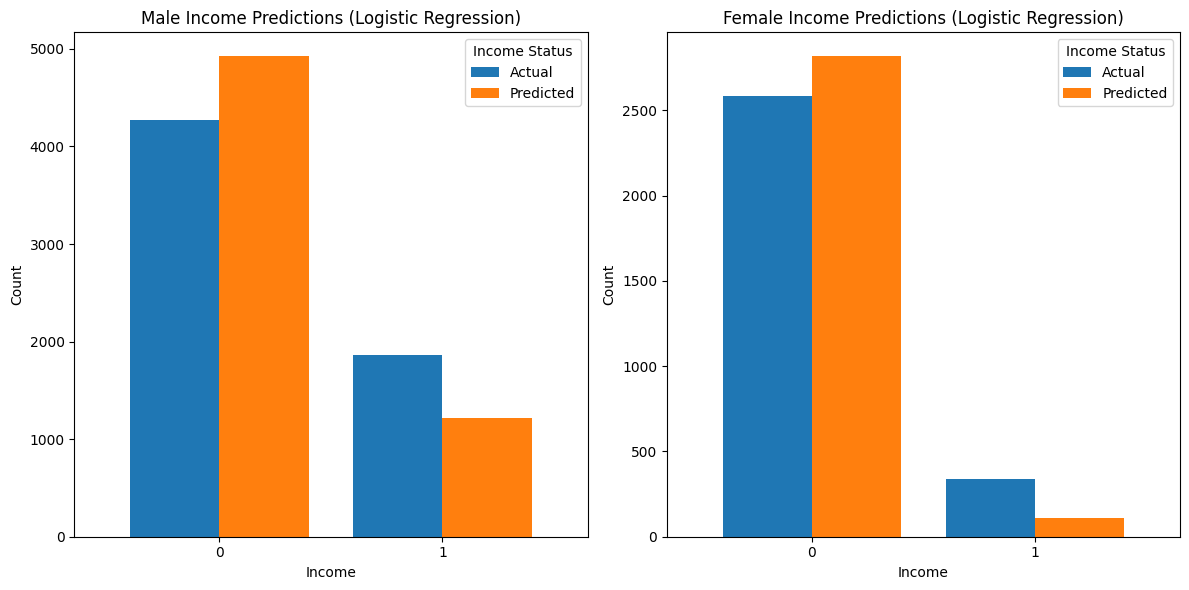

       Predicted Income  Actual Income     Sex
20156                 0              0  Female
28772                 0              0  Female
1732                  0              0    Male
38871                 0              0    Male
27566                 0              0    Male
...                 ...            ...     ...
27294                 0              1    Male
7892                  0              0    Male
29836                 1              0  Female
40212                 0              0    Male
36923                 0              0    Male

[9068 rows x 3 columns]
      Predicted Income Actual Income     Sex
20156            <=50K         <=50K  Female
28772            <=50K         <=50K  Female
1732             <=50K         <=50K    Male
38871            <=50K         <=50K    Male
27566             >50K         <=50K    Male
...                ...           ...     ...
27294             >50K          >50K    Male
7892             <=50K         <=50K    Male
29836 

In [21]:
def plot_income_predictions(results_df, model_name):
    # Filter for males and females
    male_df = results_df[results_df['Sex'] == 'Male']
    female_df = results_df[results_df['Sex'] == 'Female']

    # Count occurrences for males
    male_actual_counts = male_df['Actual Income'].value_counts()
    male_predicted_counts = male_df['Predicted Income'].value_counts()

    # Count occurrences for females
    female_actual_counts = female_df['Actual Income'].value_counts()
    female_predicted_counts = female_df['Predicted Income'].value_counts()

    # Create a DataFrame to hold counts for males
    male_income_counts = pd.DataFrame({
        'Actual': male_actual_counts,
        'Predicted': male_predicted_counts
    }).fillna(0)

    # Create a DataFrame to hold counts for females
    female_income_counts = pd.DataFrame({
        'Actual': female_actual_counts,
        'Predicted': female_predicted_counts
    }).fillna(0)

    # Create side-by-side bar plots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

    # Male plot
    male_income_counts.plot(kind='bar', ax=axes[0], color=['#1f77b4', '#ff7f0e'], width=0.8)
    axes[0].set_title(f'Male Income Predictions ({model_name})')
    axes[0].set_ylabel('Count')
    axes[0].set_xlabel('Income')
    axes[0].set_xticklabels(male_income_counts.index, rotation=0)
    axes[0].legend(title='Income Status', loc='upper right')

    # Female plot
    female_income_counts.plot(kind='bar', ax=axes[1], color=['#1f77b4', '#ff7f0e'], width=0.8)
    axes[1].set_title(f'Female Income Predictions ({model_name})')
    axes[1].set_ylabel('Count')
    axes[1].set_xlabel('Income')
    axes[1].set_xticklabels(female_income_counts.index, rotation=0)
    axes[1].legend(title='Income Status', loc='upper right')

    plt.tight_layout()
    plt.show()

# Usage for results_df_lda.pkl
with open('pickle/results_df_lda.pkl', 'rb') as f:
    results_df_lda = pickle.load(f)
plot_income_predictions(results_df_lda, 'LDA')

# Usage for results_df_rf.pkl
with open('pickle/results_df_rf.pkl', 'rb') as f:
    results_df_rf = pickle.load(f)
plot_income_predictions(results_df_rf, 'Random Forest')

# Usage for results_df_logit.pkl
with open('pickle/results_df_logit.pkl', 'rb') as f:
     results_df_logit = pickle.load(f)
     results_df_logit['Sex'] = results_df_logit['Sex'].replace({1: 'Female', 0: 'Male'})
plot_income_predictions(results_df_logit, 'Logistic Regression')